# Classifying Fashion Dataset using Tensorflow 2.x

In [59]:
## importing the libraries

import tensorflow as tf
from tensorflow import keras 

from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout

import pandas as pd

## Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Loading MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## Performing Data Wrangling

In [3]:
# Data Exploration - Getting Shape if the data
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
## Converting the data into float 32 for model training

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [5]:
## Reshaping the test and train data for model to accept it

model_shape = 784
#print(model_shape)
X_train = X_train.reshape(60000, model_shape) 
X_test = X_test.reshape(10000, model_shape) 

In [6]:
## Converting the data into float 32 for model training

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [7]:
## Normalising the data since there are 0 - 255 pixels in each element

X_train = X_train / 255
X_test = X_test / 255

In [8]:
## Verifying the shape of model after normalisation
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [9]:
## Converting target column into categorical data using one hot encoding

Y_train = tf.keras.utils.to_categorical(Y_train, 10) 
Y_test = tf.keras.utils.to_categorical(Y_test, 10)

## Preparing the model

##### Basic Model with SGD

In [10]:
## Basic Model
model_basic = Sequential()

model_basic.add(Dense(10,input_shape=(model_shape,),name='dense_layer', activation='softmax')) 

In [11]:
## Compiling the model with SGD

model_basic.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
## Training the model

training = model_basic.fit(X_train, Y_train, batch_size=50, epochs=30, validation_split=0.2)

Epoch 1/30
960/960 [==============================] - 3s 2ms/step - loss: 0.9629 - accuracy: 0.6965 - val_loss: 0.7226 - val_accuracy: 0.7648
Epoch 2/30
960/960 [==============================] - 2s 2ms/step - loss: 0.6725 - accuracy: 0.7844 - val_loss: 0.6294 - val_accuracy: 0.7965
Epoch 3/30
960/960 [==============================] - 2s 2ms/step - loss: 0.6070 - accuracy: 0.8054 - val_loss: 0.5873 - val_accuracy: 0.8067
Epoch 4/30
960/960 [==============================] - 2s 2ms/step - loss: 0.5712 - accuracy: 0.8150 - val_loss: 0.5611 - val_accuracy: 0.8138
Epoch 5/30
960/960 [==============================] - 2s 2ms/step - loss: 0.5478 - accuracy: 0.8223 - val_loss: 0.5403 - val_accuracy: 0.8181
Epoch 6/30
960/960 [==============================] - 2s 2ms/step - loss: 0.5308 - accuracy: 0.8251 - val_loss: 0.5269 - val_accuracy: 0.8225
Epoch 7/30
960/960 [==============================] - 2s 2ms/step - loss: 0.5179 - accuracy: 0.8295 - val_loss: 0.5189 - val_accuracy: 0.8231
Epoch 

In [13]:
#evaluate the model
test_loss, test_acc = model_basic.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.4699 - accuracy: 0.8364
Test accuracy: 0.8363999724388123


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


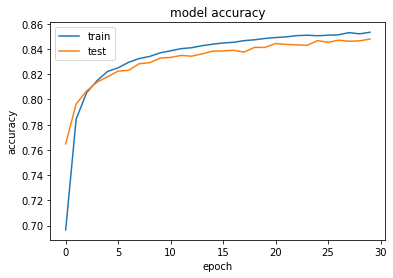

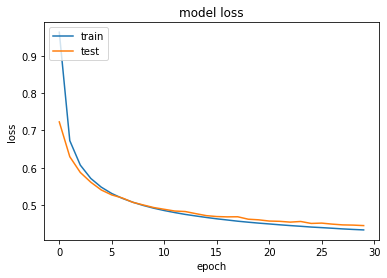

In [14]:
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Creating Multilayer Perceptron and adding dropout layer to stop overfitting

In [15]:
model_imp = tf.keras.Sequential()
N_hidden = 64
model_imp.add(Dense(N_hidden, name='Input_layer_1', input_shape=(784,), activation = 'relu')) ## Input Layer
model_imp.add(Dropout(0.3))  ## Adding a drop out layer
model_imp.add(Dense(N_hidden, name='layer_2', activation='relu'))  ## Adding a Dense Layer
model_imp.add(Dropout(0.3))  ## Adding a drop out layer
model_imp.add(Dense(N_hidden, name='layer_3', activation='relu'))  ## Adding a Dense Layer
model_imp.add(Dropout(0.3))  ## Adding a drop out layer
model_imp.add(Dense(10, name='Output_layer_4', activation = 'softmax'))  ## Output Layer

In [16]:
## Compiling the model with Adam

model_imp.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
## Training the model

training = model_imp.fit(X_train, Y_train, batch_size=50, epochs=30, validation_split=0.2, verbose = 2)

Epoch 1/30
960/960 - 3s - loss: 0.8486 - accuracy: 0.6950 - val_loss: 0.5019 - val_accuracy: 0.8137
Epoch 2/30
960/960 - 2s - loss: 0.5539 - accuracy: 0.8056 - val_loss: 0.4275 - val_accuracy: 0.8402
Epoch 3/30
960/960 - 2s - loss: 0.5035 - accuracy: 0.8224 - val_loss: 0.3998 - val_accuracy: 0.8532
Epoch 4/30
960/960 - 2s - loss: 0.4741 - accuracy: 0.8334 - val_loss: 0.3905 - val_accuracy: 0.8536
Epoch 5/30
960/960 - 2s - loss: 0.4577 - accuracy: 0.8384 - val_loss: 0.3796 - val_accuracy: 0.8614
Epoch 6/30
960/960 - 2s - loss: 0.4456 - accuracy: 0.8406 - val_loss: 0.3865 - val_accuracy: 0.8547
Epoch 7/30
960/960 - 2s - loss: 0.4322 - accuracy: 0.8464 - val_loss: 0.3714 - val_accuracy: 0.8658
Epoch 8/30
960/960 - 2s - loss: 0.4262 - accuracy: 0.8480 - val_loss: 0.3742 - val_accuracy: 0.8609
Epoch 9/30
960/960 - 2s - loss: 0.4187 - accuracy: 0.8510 - val_loss: 0.3587 - val_accuracy: 0.8658
Epoch 10/30
960/960 - 2s - loss: 0.4086 - accuracy: 0.8549 - val_loss: 0.3622 - val_accuracy: 0.8670

In [18]:
#evaluate the model
test_loss, test_acc = model_imp.evaluate(X_test, Y_test, verbose = 2)
print('Test accuracy:', test_acc)

313/313 - 1s - loss: 0.3578 - accuracy: 0.8712
Test accuracy: 0.8712000250816345


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


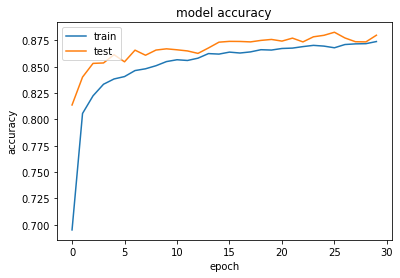

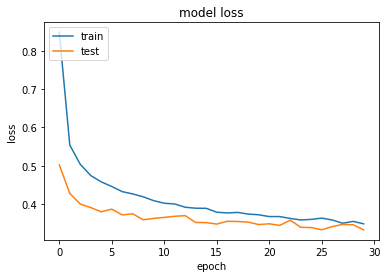

In [19]:
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
model_imp.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'name': 'Input_layer_1_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'Input_layer_1',
    'trainable': True,
    'units': 64,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout',
    'noise_shape': None,
    'rate': 0.3,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constr

## Performing Grid Search to identify best model parameters

In [21]:
## importing libraries for grip seach and kerasClassifier

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [22]:
## Writing Function for to create Dynamic Model
def createmodel(n_layers, optimizer_func, loss_func):
    N_hidden = 64
    model = Sequential()
    
    for i in range(1, n_layers):
        if i==1:
            model.add(Dense(N_hidden, name='Input_layer_1', input_shape=(784,), activation = 'relu'))
        else:
            layer_name = 'layer_'+str(i)
            model.add(Dense(N_hidden, name=layer_name, activation='relu'))
            
            
    #Finally, the output layer should have a single node in binary classification
    layer_name_out = 'Output_layer_'+str(i+1)
    model.add(Dense(10, name=layer_name_out, activation = 'softmax'))  ## Output Layer
    model.compile(optimizer=optimizer_func, loss=loss_func, metrics = ["accuracy"]) 
    
    return model

In [23]:
## Creating the Classifier Model for grid search
model_search =  KerasClassifier(build_fn=createmodel, verbose = False)  

In [27]:
## Defining the oaramters for grid search
optimizer_search = ['SGD','Adam','RMSprop'] 
loss_funcs = ['categorical_crossentropy']
param_grid = dict(n_layers=[2,3,4], optimizer_func=optimizer_search, loss_func = loss_funcs, batch_size = [50,100,150], epochs = [20,50,90])

grid = GridSearchCV(estimator = model_search, param_grid = param_grid, n_jobs = -1)

In [28]:
#Performing Grid Search for best model
grid_result = grid.fit(X_train, Y_train, verbose=2)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Epoch 1/50
400/400 - 2s - loss: 0.5887 - accuracy: 0.7999
Epoch 2/50
400/400 - 1s - loss: 0.4108 - accuracy: 0.8559
Epoch 3/50
400/400 - 1s - loss: 0.3711 - accuracy: 0.8676
Epoch 4/50
400/400 - 1s - loss: 0.3467 - accuracy: 0.8747
Epoch 5/50
400/400 - 1s - loss: 0.3307 - accuracy: 0.8800
Epoch 6/50
400/400 - 1s - loss: 0.3151 - accuracy: 0.8849
Epoch 7/50
400/400 - 1s - loss: 0.3000 - accuracy: 0.8896
Epoch 8/50
400/400 - 1s - loss: 0.2901 - accuracy: 0.8934
Epoch 9/50
400/400 - 1s - loss: 0.2812 - accuracy: 0.8972
Epoch 10/50
400/400 - 1s - loss: 0.2700 - accuracy: 0.9007
Epoch 11/50
400/400 - 1s - loss: 0.2619 - accuracy: 0.9034
Epoch 12/50
400/400 - 1s - loss: 0.2561 - accuracy: 0.9058
Epoch 13/50
400/400 - 1s - loss: 0.2509 - accuracy: 0.9068
Epoch 14/50
400/400 - 1s - loss: 0.2437 - accuracy: 0.9101
Epoch 15/50
400/400 - 1s - loss: 0.2383 - accuracy: 0.9117
Epoch 16/50
400/400 - 1s - loss: 0.2344 - accuracy: 0.9128
Epoch 17/50
400/400 - 1s - loss: 0.2288 - accuracy: 0.9154
Epoch 

In [29]:
## Best parameters for model from Grid Search
print(grid_result.best_score_)
print(grid_result.best_params_)

0.8909000039100647
{'batch_size': 150, 'epochs': 50, 'loss_func': 'categorical_crossentropy', 'n_layers': 3, 'optimizer_func': 'Adam'}


In [30]:
## Parameters of Grid Search
print(grid.cv_results_)

{'mean_fit_time': array([ 58.12757044,  59.9370079 ,  46.98634157,  50.99658704,
        69.17381301,  59.05103269,  43.2884872 ,  79.40661826,
        63.03813262, 110.4980288 , 127.60303884, 128.1058712 ,
       122.20338988, 151.45982332, 151.03647785, 113.53725648,
       194.22893233, 139.91742721, 197.43505573, 242.42360139,
       234.59486051, 197.35128007, 270.43632231, 253.78995724,
       219.56138988, 313.56610494, 288.95935354,  33.72589941,
        39.73203626,  37.15882807,  35.10186868,  45.93156657,
        39.48318253,  37.22270126,  46.60622997,  45.93965654,
        79.31090703, 109.0448154 ,  94.4270431 ,  92.63366394,
        94.34213157,  94.57306819, 108.20470653, 104.17745757,
       107.25208616, 142.28581386, 166.43558445, 169.42237601,
       150.55825109, 191.00192389, 183.29718504, 170.48486857,
       191.57114043, 199.73525267,  24.55045247,  28.14081831,
        31.1493289 ,  25.15914941,  33.12797074,  32.16414394,
        29.60807338,  35.76363058,  3

### **Data for Plotting the model performance**

In [132]:
## Creating data for ploting the values
df_param = pd.DataFrame(grid.cv_results_['params'])
df_rank = pd.DataFrame(grid.cv_results_['rank_test_score'])
df_mean_score = pd.DataFrame(grid.cv_results_['mean_test_score'])

In [133]:
print(df_param)
## Dropping loss function column as this is constant for all the models
df_param.drop(columns= 'loss_func', axis =1, inplace = True)

    batch_size  epochs                 loss_func  n_layers optimizer_func
0           50      20  categorical_crossentropy         2            SGD
1           50      20  categorical_crossentropy         2           Adam
2           50      20  categorical_crossentropy         2        RMSprop
3           50      20  categorical_crossentropy         3            SGD
4           50      20  categorical_crossentropy         3           Adam
..         ...     ...                       ...       ...            ...
76         150      90  categorical_crossentropy         3           Adam
77         150      90  categorical_crossentropy         3        RMSprop
78         150      90  categorical_crossentropy         4            SGD
79         150      90  categorical_crossentropy         4           Adam
80         150      90  categorical_crossentropy         4        RMSprop

[81 rows x 5 columns]


In [134]:
## Renaming the column to correct name in dataframe
df_rank.rename(columns={0: 'Rank'}, inplace = True)
print(df_rank)

    Rank
0     74
1     18
2     20
3     69
4     32
..   ...
76    36
77    48
78    59
79    22
80    46

[81 rows x 1 columns]


In [135]:
## Renaming the column to correct name in dataframe
df_mean_score.rename(columns={0: 'Mean_Score'}, inplace= True)
print(df_mean_score)

    Mean_Score
0     0.862717
1     0.886200
2     0.886150
3     0.872167
4     0.884867
..         ...
76    0.884550
77    0.881917
78    0.878200
79    0.886050
80    0.882500

[81 rows x 1 columns]


In [136]:
## Merging two dataframe based on index
mergedDf = df_param.merge(df_rank, left_index=True, right_index=True)

In [137]:
## Merging two dataframe based on index and creating a final dataframe for plotting the performance
df_score = mergedDf.merge(df_mean_score, left_index=True, right_index=True)

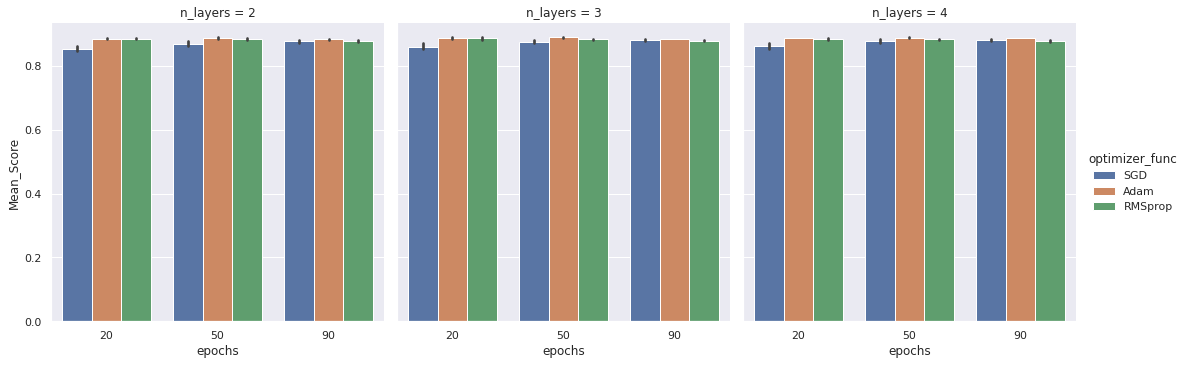

In [138]:
## Plotting mean score to see the best performing model
## Calling Seaborn library to plot visual barplots

sns.set(rc={'figure.figsize':(12,10)})
sns.catplot(x="epochs", y="Mean_Score",
                hue ="optimizer_func", 
                kind="bar", col="n_layers",
                data=df_score )

## **Training with best model parameters** 

In [139]:
print(grid_result.best_params_)

{'batch_size': 150, 'epochs': 50, 'loss_func': 'categorical_crossentropy', 'n_layers': 3, 'optimizer_func': 'Adam'}


In [156]:
model_imp = tf.keras.Sequential()
N_hidden = 64
model_imp.add(Dense(N_hidden, name='Input_layer_1', input_shape=(784,), activation = 'relu')) ## Input Layer
model_imp.add(Dropout(0.3))  ## Adding a drop out layer
model_imp.add(Dense(N_hidden, name='layer_2', activation='relu'))  ## Adding a Dense Layer
model_imp.add(Dropout(0.3))  ## Adding a drop out layer
model_imp.add(Dense(N_hidden, name='layer_3', activation='relu'))  ## Adding a Dense Layer
model_imp.add(Dropout(0.3))  ## Adding a drop out layer
model_imp.add(Dense(10, name='Output_layer_5', activation = 'softmax'))  ## Output Layer

In [157]:
## Compiling the model with Adam

model_imp.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [158]:
## Training the model

training = model_imp.fit(X_train, Y_train, batch_size=150, epochs=50, validation_split=0.2, verbose = 2)

Epoch 1/50
320/320 - 2s - loss: 1.0291 - accuracy: 0.6244 - val_loss: 0.5277 - val_accuracy: 0.8135
Epoch 2/50
320/320 - 1s - loss: 0.5984 - accuracy: 0.7920 - val_loss: 0.4439 - val_accuracy: 0.8399
Epoch 3/50
320/320 - 1s - loss: 0.5359 - accuracy: 0.8146 - val_loss: 0.4369 - val_accuracy: 0.8369
Epoch 4/50
320/320 - 1s - loss: 0.4990 - accuracy: 0.8255 - val_loss: 0.4061 - val_accuracy: 0.8542
Epoch 5/50
320/320 - 1s - loss: 0.4750 - accuracy: 0.8330 - val_loss: 0.3959 - val_accuracy: 0.8567
Epoch 6/50
320/320 - 1s - loss: 0.4588 - accuracy: 0.8404 - val_loss: 0.3822 - val_accuracy: 0.8626
Epoch 7/50
320/320 - 1s - loss: 0.4388 - accuracy: 0.8444 - val_loss: 0.3731 - val_accuracy: 0.8635
Epoch 8/50
320/320 - 1s - loss: 0.4314 - accuracy: 0.8494 - val_loss: 0.3695 - val_accuracy: 0.8668
Epoch 9/50
320/320 - 1s - loss: 0.4198 - accuracy: 0.8537 - val_loss: 0.3784 - val_accuracy: 0.8649
Epoch 10/50
320/320 - 1s - loss: 0.4124 - accuracy: 0.8548 - val_loss: 0.3598 - val_accuracy: 0.8719

In [159]:
#evaluate the model
test_loss, test_acc = model_imp.evaluate(X_test, Y_test, verbose = 2)
print('Test accuracy:', test_acc)

313/313 - 1s - loss: 0.3635 - accuracy: 0.8735
Test accuracy: 0.8734999895095825


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


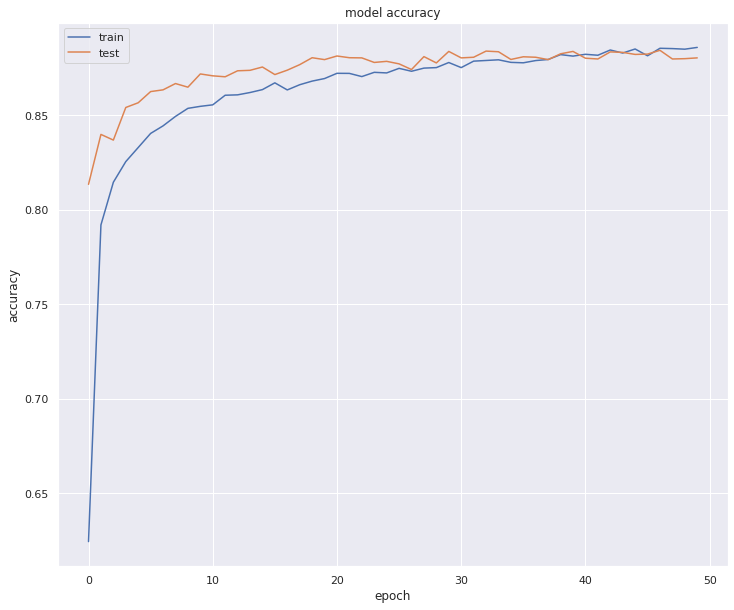

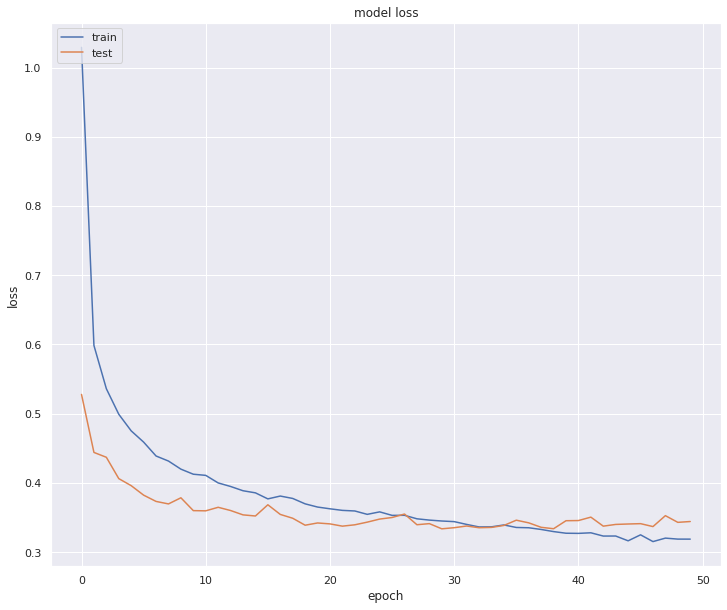

In [160]:
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [161]:
model_imp.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'name': 'Input_layer_1_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'Input_layer_1',
    'trainable': True,
    'units': 64,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout_12',
    'noise_shape': None,
    'rate': 0.3,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_con